In [1]:
import pandas as pd
from sklearn.model_selection import cross_val_score
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/Users/dipeshkumar/Downloads/archive/Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df = df.iloc[:,1:]

In [4]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
encoder = LabelEncoder()

In [7]:
df['Species'] = encoder.fit_transform(df['Species'])

In [8]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
df = df[df['Species'] != 0][['SepalWidthCm','PetalLengthCm','Species']]

In [10]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

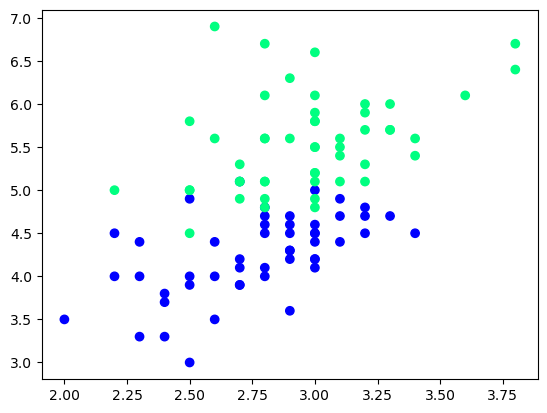

In [12]:
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'],cmap='winter')

In [13]:
#Taking 10 rows for training
df =df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[60:,:].sample(5)

In [14]:
x_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [15]:
x_test

array([[2.7, 4.2],
       [2.7, 4.9],
       [3.4, 4.5],
       [2. , 3.5],
       [2.7, 3.9]])

In [16]:
#CASE 1 BAGGING
df_bag = df_train.sample(9,replace=True)
x = df_bag.iloc[:,0:2]
y=df_bag.iloc[:,-1]
df_bag

,SepalWidthCm,PetalLengthCm,Species
135,3.0,6.1,2
115,3.2,5.3,2
55,2.8,4.5,1
69,2.5,3.9,1
115,3.2,5.3,2
142,2.7,5.1,2
69,2.5,3.9,1
55,2.8,4.5,1
106,2.5,4.5,2


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [20]:
def evaluate(clf,x,y):
    clf.fit(x,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(x.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(x_test)
    print(accuracy_score(y_test,y_pred))

In [21]:
dt_bag1 = DecisionTreeClassifier()

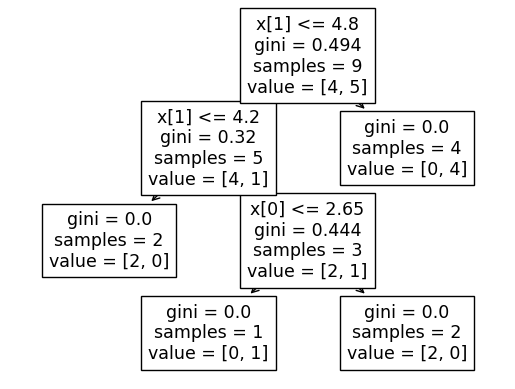

1.0


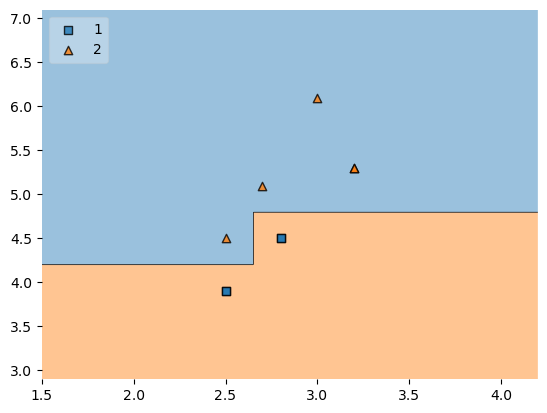

In [22]:
evaluate(dt_bag1,x,y)

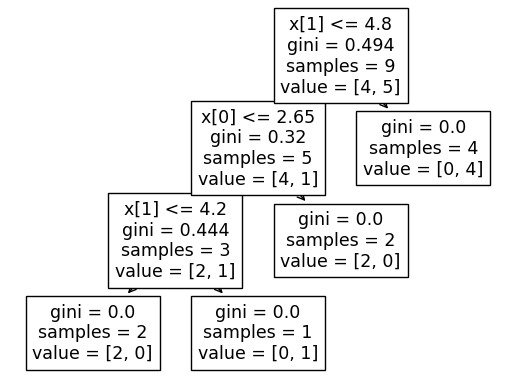

1.0


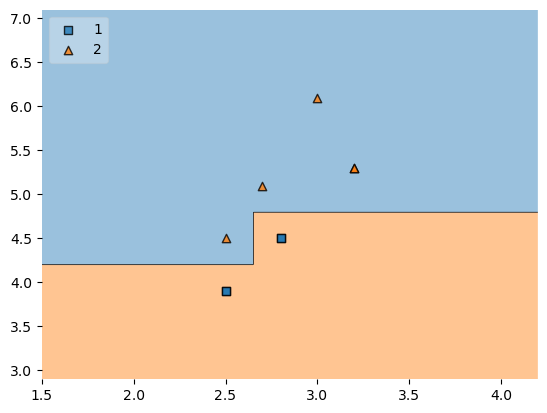

In [23]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,x,y)

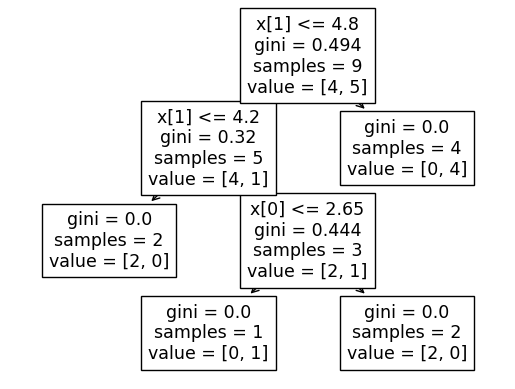

1.0


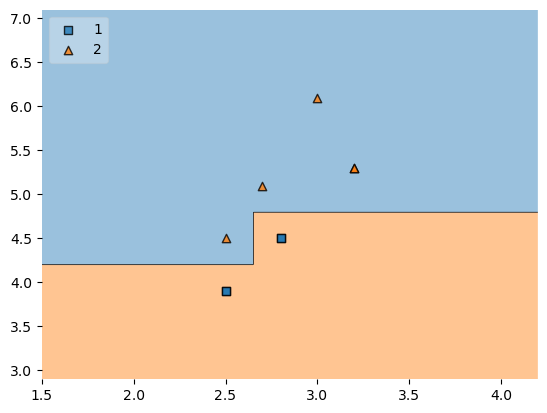

In [24]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,x,y)

In [25]:
df_test

,SepalWidthCm,PetalLengthCm,Species
85,3.4,4.5,1
82,2.7,3.9,1
77,3.0,5.0,1
143,3.2,5.9,2
138,3.0,4.8,2


In [32]:
prediction1 = dt_bag1.predict(np.array([3.4, 4.5]).reshape(1, 2))
prediction2 = dt_bag2.predict(np.array([3.4, 4.5]).reshape(1, 2))
prediction3 = dt_bag3.predict(np.array([3.4, 4.5]).reshape(1, 2))

In [33]:
mean_prediction = np.mean([prediction1, prediction2, prediction3])

In [34]:
print("Predictor 1:", prediction1)
print("Predictor 2:", prediction2)
print("Predictor 3:", prediction3)
print("Mean Prediction:", mean_prediction)

Predictor 1: [1]
Predictor 2: [1]
Predictor 3: [1]
Mean Prediction: 1.0


In [42]:
# Create random float arrays for input
random_input = np.random.uniform(low=1.0, high=10.0, size=(1, 2))

# Assuming dt_bag1, dt_bag2, and dt_bag3 are your classifiers
prediction1 = dt_bag1.predict(random_input)
prediction2 = dt_bag2.predict(random_input)
prediction3 = dt_bag3.predict(random_input)

# Calculate the mean of the predictions
mean_prediction = np.mean([prediction1, prediction2, prediction3])

print("Random Input:", random_input)
print("Predictor 1:", prediction1)
print("Predictor 2:", prediction2)
print("Predictor 3:", prediction3)
print("Mean Prediction:", mean_prediction)


Random Input: [[4.90526121 1.86942275]]
Predictor 1: [1]
Predictor 2: [1]
Predictor 3: [1]
Mean Prediction: 1.0
